In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from math import pi

%matplotlib inline

In [53]:
import os
os.chdir("E:/Python/NUS/fundamentals of data analyrics/project/IT5006_project/data")
current_directory = os.getcwd()

In [54]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("data.csv")
data.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,an

In [12]:
data.columns = data.columns.str.replace(' ', '')
data.columns = data.columns.str.replace(',', '')
data.columns = data.columns.str.replace('/', '')
data.columns = data.columns.str.replace('-', '')
data.head()

,TotalHouseholdIncome,Region,TotalFoodExpenditure,MainSourceofIncome,AgriculturalHouseholdindicator,BreadandCerealsExpenditure,TotalRiceExpenditure,MeatExpenditure,TotalFishandmarineproductsExpenditure,FruitExpenditure,VegetablesExpenditure,RestaurantandhotelsExpenditure,AlcoholicBeveragesExpenditure,TobaccoExpenditure,ClothingFootwearandOtherWearExpenditure,HousingandwaterExpenditure,ImputedHouseRentalValue,MedicalCareExpenditure,TransportationExpenditure,CommunicationExpenditure,EducationExpenditure,MiscellaneousGoodsandServicesExpenditure,SpecialOccasionsExpenditure,CropFarmingandGardeningexpenses,TotalIncomefromEntrepreneurialAcitivites,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,TypeofBuildingHouse,TypeofRoof,TypeofWalls,HouseFloorArea,HouseAge,Numberofbedrooms,TenureStatus,ToiletFacilities,Electricity,MainSourceofWaterSupply,NumberofTelevision,NumberofCDVCDDVD,NumberofComponentStereoset,NumberofRefrigeratorFreezer,NumberofWashingMachine,NumberofAirconditioner,NumberofCarJeepVan,NumberofLandlinewirelesstelephones,NumberofCellularphone,NumberofPersonalComputer,NumberofStovewithOvenGasRange,NumberofMotorizedBanca,NumberofMotorcycleTricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,anahaw)",Quite Strong,54,16,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,0,0

In [13]:
data.tail()

,TotalHouseholdIncome,Region,TotalFoodExpenditure,MainSourceofIncome,AgriculturalHouseholdindicator,BreadandCerealsExpenditure,TotalRiceExpenditure,MeatExpenditure,TotalFishandmarineproductsExpenditure,FruitExpenditure,VegetablesExpenditure,RestaurantandhotelsExpenditure,AlcoholicBeveragesExpenditure,TobaccoExpenditure,ClothingFootwearandOtherWearExpenditure,HousingandwaterExpenditure,ImputedHouseRentalValue,MedicalCareExpenditure,TransportationExpenditure,CommunicationExpenditure,EducationExpenditure,MiscellaneousGoodsandServicesExpenditure,SpecialOccasionsExpenditure,CropFarmingandGardeningexpenses,TotalIncomefromEntrepreneurialAcitivites,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,TypeofBuildingHouse,TypeofRoof,TypeofWalls,HouseFloorArea,HouseAge,Numberofbedrooms,TenureStatus,ToiletFacilities,Electricity,MainSourceofWaterSupply,NumberofTelevision,NumberofCDVCDDVD,NumberofComponentStereoset,NumberofRefrigeratorFreezer,NumberofWashingMachine,NumberofAirconditioner,NumberofCarJeepVan,NumberofLandlinewirelesstelephones,NumberofCellularphone,NumberofPersonalComputer,NumberofStovewithOvenGasRange,NumberofMotorizedBanca,NumberofMotorcycleTricycle
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,3882,1805,0,133,1395,18372,12000,294,2124,600,50,3978,2500,94120,94120,Male,42,Married,Elementary Graduate,With Job/Business,Rice farmers,Self-employed wihout any employee,Extended Family,6,2,0,0,Single house,Mixed but predominantly strong materials,Strong,30,14,1,Own or owner-like possession of house and lot,Open pit,1,"Own use, tubed/piped deep well",1,0,0,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,3110,9090,0,300,3136,17640,10800,890,2568,1560,1550,6090,1500,78270,78270,Male,49,Married,Elementary Graduate,With Job/Business,Rice farmers,Self-employed wihout any employee,Single Family,6,0,3,0,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,40,6,2,Own or owner-like possession of house and lot,Open pit,1,"Own use, tubed/piped deep well",1,1,0,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,3025,3330,0,0,2460,9240,4800,540,2040,1080,0,3570,500,54965,98545,Male,56,Married,Grade 1,With Job/Business,Rice farmers,Self-employed wihout any employee,Single Family,4,0,0,1,Single house,"Light material (cogon,nipa,anahaw)",Strong,35,20,1,"Own house, rent-free lot with consent of owner",Open pit,1,"Own use, tubed/piped deep well",0,0,0,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,7951,13660,0,630,3755,12438,7200,314,2412,1020,5295,5760,1000,95785,107435,Male,34,Widowed,First Year High School,With Job/Business,Rice farmers,Self-employed wihout any employee,Extended Family,9,0,3,0,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,25,11,1,"Own house, rent-free lot without consent of owner",Open pit,1,Dug well,0,0,0,0,0,0,0,0,2,0,0,0,0
41543,128598,XII - SOCCSKSARGEN,78195,Enterpreneurial Activities,1,43485,41205,1985,7735,2062,7114,5750,0,120,2320,11316,6000,330,1560,960,80,6060,2500,84247,105547,Male,86,Married,No Grade Completed,No Job/Business,NaN,NaN,Single Family,8,1,1,0,Single house,Mixed but predominantly strong materials,Strong,28,10,1,"Own house, rent-free lot without consent of owner",Open pit,1,Dug well,0,0,0,0,0,0,0,0,1,0,0,0,0


## PROBLEM STATEMENT

In an ideal world, we would be able to eradicate poverty and create upward social mobility for all segments of our population. However, even the best governments in the world find it difficult to formulate socio-economic initiatives and budgets to effectively meet these noble ends. Instead, what we are left with is a world where the rich get richer and the poor get poorer. This effect is particularly exacerbated in developing countries. For example, a quick distribution plot of household income in the Philipines reveals that a huge chunk of the population is still at the lowest rungs of the economic ladder.

To be fair, there are numerous uncertainties in the process of devising government policies. It is not immediately apparent which the most impactful policies will be, as the demographic of country is often diverse. Add to this the complexity of differentiating the actual needs of your population from their wants. The best solution may not be the most popular one. Not many politicians have the education or experience to navigate these uncertainties. As such, it is indeed fathomable that huge amounts of taxpayer monies are squandered every year by governments which may have the best of intentions, but lack the understanding to channel their efforts in the right direction. 

In summation, we grapple with the challenge of determining the scope, scale and target audience of government policies so as to maximise upward social mobility in a population. We address this issue by providing an analytical solution based on socio-economic data. We aim to utilise unsupervised machine learning to identify clusters within the population. We will then apply a supervised machine learning pipeline containing a regression model, such as multiple linear regression, to recommend the policies which would maximise household income in each of these clusters.

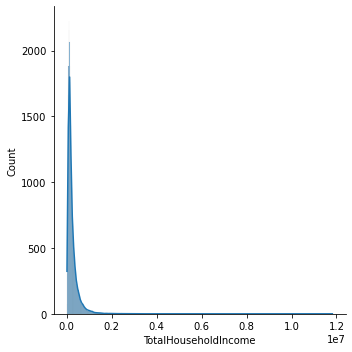

In [14]:
sns.displot(data=data, x='TotalHouseholdIncome', kde=True)

## DATASET DESCRIPTION

In [15]:
data.shape

(41544, 60)

In [16]:
data.dtypes

TotalHouseholdIncome                         int64
Region                                      object
TotalFoodExpenditure                         int64
MainSourceofIncome                          object
AgriculturalHouseholdindicator               int64
BreadandCerealsExpenditure                   int64
TotalRiceExpenditure                         int64
MeatExpenditure                              int64
TotalFishandmarineproductsExpenditure        int64
FruitExpenditure                             int64
VegetablesExpenditure                        int64
RestaurantandhotelsExpenditure               int64
AlcoholicBeveragesExpenditure                int64
TobaccoExpenditure                           int64
ClothingFootwearandOtherWearExpenditure      int64
HousingandwaterExpenditure                   int64
ImputedHouseRentalValue                      int64
MedicalCareExpenditure                       int64
TransportationExpenditure                    int64
CommunicationExpenditure       

##### The data we used for our analysis was obtained from the 'xxx'. It contains various indicators and metrics which illustrate the socio-economic background, income and spending habits of the demographic in Philipines. 
##### The dataset contains 41544 datapoints with 60 features. Some notable features are:
##### - Total Household Income: Provides the combined income across all members in the household.
##### - Region: Provides the area of residence of each family and can be used to estimate the overall wealth distribution across the Philipines.
##### - Total Food Expenditure: Illustrates the amount spent by each family on the basic essential of food. Can be used to calculate the food expenditure per person in a family to further analyse their spending habits.
##### - Education Expenditure: Illustrates the amount spent by each family on education. Can be compared alongside household income and household education level to assess the accessibility of education.

## MISSING VALUES

In [17]:
data.isnull().sum()

TotalHouseholdIncome                           0
Region                                         0
TotalFoodExpenditure                           0
MainSourceofIncome                             0
AgriculturalHouseholdindicator                 0
BreadandCerealsExpenditure                     0
TotalRiceExpenditure                           0
MeatExpenditure                                0
TotalFishandmarineproductsExpenditure          0
FruitExpenditure                               0
VegetablesExpenditure                          0
RestaurantandhotelsExpenditure                 0
AlcoholicBeveragesExpenditure                  0
TobaccoExpenditure                             0
ClothingFootwearandOtherWearExpenditure        0
HousingandwaterExpenditure                     0
ImputedHouseRentalValue                        0
MedicalCareExpenditure                         0
TransportationExpenditure                      0
CommunicationExpenditure                       0
EducationExpenditure

a & b). 7536 values of two features are missing (Household Head Occupation and Household Head Class of Worker)

c). We do not want to remove them as yet as they may hold statistical significance. We are attempting to predict Total Household Income, which the Household Head's occupation would significantly influence. Instead, we should try to estimate and impute these missing values. 

d). It can be reasonably assumed that a combination of factors such as age, gender and educational qualifications would affect one's occupation. As such, we can examine the correlation of 'Household Head Occupation/Class of Worker' with other features of the 'Household Head ...' variety. This can be used to estimate the missing values.

In [18]:
data['HouseholdHeadJoborBusinessIndicator'].value_counts()

With Job/Business    34008
No Job/Business       7536
Name: HouseholdHeadJoborBusinessIndicator, dtype: int64

Upon closer examination of the 'Household Head' features, we see that the 7536 null values occur because they are unemployed.
We can therefore replace the null values with 'Unemployed' as a categorical variable, which still holds analytical value.

In [19]:
data['HouseholdHeadClassofWorker'].fillna('Unemployed', inplace=True)
data['HouseholdHeadOccupation'].fillna('Unemployed', inplace=True)

In [20]:
data.isnull().sum()

TotalHouseholdIncome                        0
Region                                      0
TotalFoodExpenditure                        0
MainSourceofIncome                          0
AgriculturalHouseholdindicator              0
BreadandCerealsExpenditure                  0
TotalRiceExpenditure                        0
MeatExpenditure                             0
TotalFishandmarineproductsExpenditure       0
FruitExpenditure                            0
VegetablesExpenditure                       0
RestaurantandhotelsExpenditure              0
AlcoholicBeveragesExpenditure               0
TobaccoExpenditure                          0
ClothingFootwearandOtherWearExpenditure     0
HousingandwaterExpenditure                  0
ImputedHouseRentalValue                     0
MedicalCareExpenditure                      0
TransportationExpenditure                   0
CommunicationExpenditure                    0
EducationExpenditure                        0
MiscellaneousGoodsandServicesExpen

## FEATURES

##### Replace ALL Categorical Features with Dummy Variables

In [21]:
obj_df = data.select_dtypes(include=['object']).copy()
for item in obj_df.columns:
    obj_df[item] = obj_df[item].astype('category')
    obj_df[item] = obj_df[item].cat.codes
obj_df.head()

,Region,MainSourceofIncome,HouseholdHeadSex,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TypeofBuildingHouse,TypeofRoof,TypeofWalls,TenureStatus,ToiletFacilities,MainSourceofWaterSupply
0,1,2,0,3,41,1,123,3,0,5,6,4,4,7,3
1,1,2,1,2,44,1,354,4,1,5,6,4,4,7,3
2,1,2,1,2,16,1,103,4,1,5,0,0,4,6,7
3,1,2,1,2,6,1,287,0,1,5,0,0,4,0,3
4,1,2,1,2,6,1,128,1,1,5,0,2,4,7,3


In [22]:
data2 = data.copy()
for item in data2.columns:
    if item in obj_df.columns:
        data2[item] = obj_df[item]
data2.head()

,TotalHouseholdIncome,Region,TotalFoodExpenditure,MainSourceofIncome,AgriculturalHouseholdindicator,BreadandCerealsExpenditure,TotalRiceExpenditure,MeatExpenditure,TotalFishandmarineproductsExpenditure,FruitExpenditure,VegetablesExpenditure,RestaurantandhotelsExpenditure,AlcoholicBeveragesExpenditure,TobaccoExpenditure,ClothingFootwearandOtherWearExpenditure,HousingandwaterExpenditure,ImputedHouseRentalValue,MedicalCareExpenditure,TransportationExpenditure,CommunicationExpenditure,EducationExpenditure,MiscellaneousGoodsandServicesExpenditure,SpecialOccasionsExpenditure,CropFarmingandGardeningexpenses,TotalIncomefromEntrepreneurialAcitivites,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,TypeofBuildingHouse,TypeofRoof,TypeofWalls,HouseFloorArea,HouseAge,Numberofbedrooms,TenureStatus,ToiletFacilities,Electricity,MainSourceofWaterSupply,NumberofTelevision,NumberofCDVCDDVD,NumberofComponentStereoset,NumberofRefrigeratorFreezer,NumberofWashingMachine,NumberofAirconditioner,NumberofCarJeepVan,NumberofLandlinewirelesstelephones,NumberofCellularphone,NumberofPersonalComputer,NumberofStovewithOvenGasRange,NumberofMotorizedBanca,NumberofMotorcycleTricycle
0,480332,1,117848,2,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,0,49,3,41,1,123,3,0,4,0,1,1,5,6,4,80,75,3,4,7,1,3,1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,1,67766,2,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,1,40,2,44,1,354,4,1,3,0,1,2,5,6,4,42,15,2,4,7,1,3,1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,1,61609,2,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,1,39,2,16,1,103,4,1,6,0,4,3,5,0,0,35,12,1,4,6,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,1,78189,2,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,1,52,2,6,1,287,0,1,3,0,3,2,5,0,0,30,15,1,4,0,1,3,1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,1,94625,2,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,1,65,2,6,1,128,1,1,4,0,0,2,5,0,2,54,16,3,4,7,1,3,1,0,0,1,0,0,0,0,3,0,0,0,1


### Prep dataset and conduct Multiple Linear Regression

In [23]:
namelist = data.columns.tolist()
def listToString(li):  
    strg = ""  
    for ele in li:  
        strg = strg + ' + ' + ele  
    return strg
listToString(namelist)

' + TotalHouseholdIncome + Region + TotalFoodExpenditure + MainSourceofIncome + AgriculturalHouseholdindicator + BreadandCerealsExpenditure + TotalRiceExpenditure + MeatExpenditure + TotalFishandmarineproductsExpenditure + FruitExpenditure + VegetablesExpenditure + RestaurantandhotelsExpenditure + AlcoholicBeveragesExpenditure + TobaccoExpenditure + ClothingFootwearandOtherWearExpenditure + HousingandwaterExpenditure + ImputedHouseRentalValue + MedicalCareExpenditure + TransportationExpenditure + CommunicationExpenditure + EducationExpenditure + MiscellaneousGoodsandServicesExpenditure + SpecialOccasionsExpenditure + CropFarmingandGardeningexpenses + TotalIncomefromEntrepreneurialAcitivites + HouseholdHeadSex + HouseholdHeadAge + HouseholdHeadMaritalStatus + HouseholdHeadHighestGradeCompleted + HouseholdHeadJoborBusinessIndicator + HouseholdHeadOccupation + HouseholdHeadClassofWorker + TypeofHousehold + TotalNumberofFamilymembers + Memberswithagelessthan5yearold + Memberswithage517year

In [24]:
mul_est = smf.ols(formula='TotalHouseholdIncome ~ Region + TotalFoodExpenditure + MainSourceofIncome + AgriculturalHouseholdindicator + BreadandCerealsExpenditure + TotalRiceExpenditure + MeatExpenditure + TotalFishandmarineproductsExpenditure + FruitExpenditure + VegetablesExpenditure + RestaurantandhotelsExpenditure + AlcoholicBeveragesExpenditure + TobaccoExpenditure + ClothingFootwearandOtherWearExpenditure + HousingandwaterExpenditure + ImputedHouseRentalValue + MedicalCareExpenditure + TransportationExpenditure + CommunicationExpenditure + EducationExpenditure + MiscellaneousGoodsandServicesExpenditure + SpecialOccasionsExpenditure + CropFarmingandGardeningexpenses + TotalIncomefromEntrepreneurialAcitivites + HouseholdHeadSex + HouseholdHeadAge + HouseholdHeadMaritalStatus + HouseholdHeadHighestGradeCompleted + HouseholdHeadJoborBusinessIndicator + HouseholdHeadOccupation + HouseholdHeadClassofWorker + TypeofHousehold + TotalNumberofFamilymembers + Memberswithagelessthan5yearold + Memberswithage517yearsold + Totalnumberoffamilymembersemployed + TypeofBuildingHouse + TypeofRoof + TypeofWalls + HouseFloorArea + HouseAge + Numberofbedrooms + TenureStatus + ToiletFacilities + Electricity + MainSourceofWaterSupply + NumberofTelevision + NumberofCDVCDDVD + NumberofComponentStereoset + NumberofRefrigeratorFreezer + NumberofWashingMachine + NumberofAirconditioner + NumberofCarJeepVan + NumberofLandlinewirelesstelephones + NumberofCellularphone + NumberofPersonalComputer + NumberofStovewithOvenGasRange + NumberofMotorizedBanca + NumberofMotorcycleTricycle', data=data2).fit()

In [25]:
mul_est.params

Intercept                                  -24513.738529
Region                                       -156.231050
TotalFoodExpenditure                            0.471283
MainSourceofIncome                          27200.024006
AgriculturalHouseholdindicator              -3476.492536
BreadandCerealsExpenditure                      0.022990
TotalRiceExpenditure                           -0.209966
MeatExpenditure                                 0.024181
TotalFishandmarineproductsExpenditure           0.886993
FruitExpenditure                                0.455746
VegetablesExpenditure                          -0.759607
RestaurantandhotelsExpenditure                  0.208643
AlcoholicBeveragesExpenditure                   0.583004
TobaccoExpenditure                             -0.085709
ClothingFootwearandOtherWearExpenditure         2.317687
HousingandwaterExpenditure                      0.721883
ImputedHouseRentalValue                         0.529737
MedicalCareExpenditure         

In [26]:
mul_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     TotalHouseholdIncome   R-squared:                       0.832
Model:                              OLS   Adj. R-squared:                  0.832
Method:                   Least Squares   F-statistic:                     3490.
Date:                  Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                          15:15:32   Log-Likelihood:            -5.4393e+05
No. Observations:                 41544   AIC:                         1.088e+06
Df Residuals:                     41484   BIC:                         1.089e+06
Df Model:                            59                                         
Covariance Type:              nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                -2.451e+04   7725.371     -3.173      0.002   -3.97e+04   -9371.848
Region                                    -156.2311    133.678     -1.169      0.243    -418.242     105.780
TotalFoodExpenditure                         0.4713      0.060      7.865      0.000       0.354       0.589
MainSourceofIncome                         2.72e+04    955.227     28.475      0.000    2.53e+04    2.91e+04
AgriculturalHouseholdindicator           -3476.4925    920.099     -3.778      0.000   -5279.906   -1673.079
BreadandCerealsExpenditure                   0.0230      0.126      0.182      0.855      -0.224       0.270
TotalRiceExpenditure                        -0.2100      0.107     -1.958      0.050      -0.420       0.000
MeatExpenditure                              0.0242      0.113      0.213      0.831      -0.198       0.246
TotalFishandmarineproductsExpenditure        0.8870      0.116      7.636      0.000       0.659       1.115
FruitExpenditure                             0.4557      0.254      1.795      0.073      -0.042       0.953
VegetablesExpenditure                       -0.7596      0.240     -3.171      0.002      -1.229      -0.290
RestaurantandhotelsExpenditure               0.2086      0.066      3.177      0.001       0.080       0.337
AlcoholicBeveragesExpenditure                0.5830      0.285      2.045      0.041       0.024       1.142
TobaccoExpenditure                          -0.0857      0.153     -0.559      0.576      -0.386       0.215
ClothingFootwearandOtherWearExpenditure      2.3177      0.106     21.767      0.000       2.109       2.526
HousingandwaterExpenditure                   0.7219      0.035     20.693      0.000       0.654       0.790
ImputedHouseRentalValue                      0.5297      0.040     13.187      0.000       0.451       0.608
MedicalCareExpenditure                       0.7632      0.023     33.612      0.000       0.719       0.808
TransportationExpenditure                    1.1499      0.043     26.602      0.000       1.065       1.235
CommunicationExpenditure                     4.1068      0.145     28.394      0.000       3.823       4.390
EducationExpenditure                         0.8627      0.032     27.210      0.000       0.801       0.925
MiscellaneousGoodsandServicesExpenditure     2.6180      0.048     54.181      0.000       2.523       2.713
SpecialOccasionsExpenditure                  1.1534      0.049     23.636      0.000       1.058       1.249
CropFarmingandGardeningexpenses              0.1507      0.014     11.108      0.000       0.124       0.177
TotalIncomefromEntrepreneurialAcitivites     0.7183      0.005    150.019      0.000       0.709       0.728
Household

### Good R-Score achieved for a MLR with all features included
### Add Lat/Long Data to Dataset

In [27]:
conditions = [(data['Region']=='IVA - CALABARZON'),
              (data['Region']=='NCR'),
              (data['Region']=='III - Central Luzon'),
              (data['Region']=='VI - Western Visayas'),
              (data['Region']=='VII - Central Visayas'),
              (data['Region']=='V - Bicol Region'),
              (data['Region']=='XI - Davao Region'),
              (data['Region']=='I - Ilocos Region'),
              (data['Region']=='VIII - Eastern Visayas'),
              (data['Region']==' ARMM'),
              (data['Region']=='II - Cagayan Valley'),
              (data['Region']=='XII - SOCCSKSARGEN'),
              (data['Region']=='X - Northern Mindanao'),
              (data['Region']=='IX - Zasmboanga Peninsula'),
              (data['Region']=='Caraga'),
              (data['Region']=='CAR'),
              (data['Region']=='IVB - MIMAROPA')]

values = [(14.2167,121.1667),(14.5958,120.9772),(15.0333,120.6833),(10.7167,122.5667),(10.3000,123.9000),(13.1333,123.7333),(7.0667,125.6000),(16.6200,120.3200),(11.2444,125.0039),(7.2167,124.2500),(17.6200,121.7200),(6.5000,124.8500),(8.4800,124.6500),(7.8300,123.4300),(8.9500,125.5300),(16.4152,120.5956),(13.3667,121.2000)]
lats = []
longs = []

for item in values:
    lats.append(item[0])
    longs.append(item[1])

data2['lat'] = np.select(conditions, lats)
data2['long'] = np.select(conditions, longs)
data2['RegionNames'] = data['Region']
data2.head()

,TotalHouseholdIncome,Region,TotalFoodExpenditure,MainSourceofIncome,AgriculturalHouseholdindicator,BreadandCerealsExpenditure,TotalRiceExpenditure,MeatExpenditure,TotalFishandmarineproductsExpenditure,FruitExpenditure,VegetablesExpenditure,RestaurantandhotelsExpenditure,AlcoholicBeveragesExpenditure,TobaccoExpenditure,ClothingFootwearandOtherWearExpenditure,HousingandwaterExpenditure,ImputedHouseRentalValue,MedicalCareExpenditure,TransportationExpenditure,CommunicationExpenditure,EducationExpenditure,MiscellaneousGoodsandServicesExpenditure,SpecialOccasionsExpenditure,CropFarmingandGardeningexpenses,TotalIncomefromEntrepreneurialAcitivites,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,TypeofBuildingHouse,TypeofRoof,TypeofWalls,HouseFloorArea,HouseAge,Numberofbedrooms,TenureStatus,ToiletFacilities,Electricity,MainSourceofWaterSupply,NumberofTelevision,NumberofCDVCDDVD,NumberofComponentStereoset,NumberofRefrigeratorFreezer,NumberofWashingMachine,NumberofAirconditioner,NumberofCarJeepVan,NumberofLandlinewirelesstelephones,NumberofCellularphone,NumberofPersonalComputer,NumberofStovewithOvenGasRange,NumberofMotorizedBanca,NumberofMotorcycleTricycle,lat,long,RegionNames
0,480332,1,117848,2,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,0,49,3,41,1,123,3,0,4,0,1,1,5,6,4,80,75,3,4,7,1,3,1,1,0,1,1,0,0,0,2,1,0,0,1,16.4152,120.5956,CAR
1,198235,1,67766,2,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,1,40,2,44,1,354,4,1,3,0,1,2,5,6,4,42,15,2,4,7,1,3,1,1,1,0,1,0,0,0,3,1,0,0,2,16.4152,120.5956,CAR
2,82785,1,61609,2,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,1,39,2,16,1,103,4,1,6,0,4,3,5,0,0,35,12,1,4,6,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,16.4152,120.5956,CAR
3,107589,1,78189,2,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,1,52,2,6,1,287,0,1,3,0,3,2,5,0,0,30,15,1,4,0,1,3,1,0,0,0,0,0,0,0,1,0,0,0,0,16.4152,120.5956,CAR
4,189322,1,94625,2,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,1,65,2,6,1,128,1,1,4,0,0,2,5,0,2,54,16,3,4,7,1,3,1,0,0,1,0,0,0,0,3,0,0,0,1,16.4152,120.5956,CAR


### Create Seaborn Heatmap of the Avg Household Income across Philippines

Text(0.5, 1.0, 'Avg Household Incomes across Philippines')

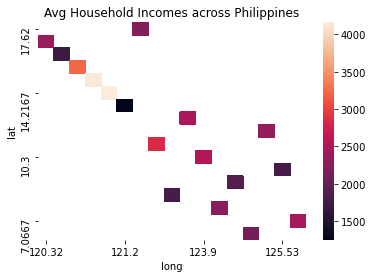

In [28]:
avginc = data2.groupby(['lat', 'long'], as_index=False)['TotalHouseholdIncome'].count().rename(columns={'TotalHouseholdIncome':'AvgHouseholdIncome'})
df = avginc.pivot('lat', 'long', 'AvgHouseholdIncome').sort_values('lat', ascending=False)
ax = plt.axes()
sns.heatmap(df, ax=ax, xticklabels=5, yticklabels=5)
ax.set_title('Avg Household Incomes across Philippines')

### Create Folium Heatmap of Population Distribution across Philippines

In [29]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [31]:
philippines_map = folium.Map(location=[14.5833, 120.9666], zoom_start=6)
coords = data2[['lat', 'long']]
heat_data = [[row['lat'],row['long']] for index, row in coords.iterrows()]
HeatMap(heat_data, name='Population Distribution', radius=15, min_opacity=0.5).add_to(philippines_map)
philippines_map

In [32]:
expenditures = [column for column in data2.columns if 'Expenditure' in column]

In [33]:
expenditures

['TotalFoodExpenditure',
 'BreadandCerealsExpenditure',
 'TotalRiceExpenditure',
 'MeatExpenditure',
 'TotalFishandmarineproductsExpenditure',
 'FruitExpenditure',
 'VegetablesExpenditure',
 'RestaurantandhotelsExpenditure',
 'AlcoholicBeveragesExpenditure',
 'TobaccoExpenditure',
 'ClothingFootwearandOtherWearExpenditure',
 'HousingandwaterExpenditure',
 'MedicalCareExpenditure',
 'TransportationExpenditure',
 'CommunicationExpenditure',
 'EducationExpenditure',
 'MiscellaneousGoodsandServicesExpenditure',
 'SpecialOccasionsExpenditure']

#### Check for the skewness for different type of exprenditures
Example : 'TotalFoodExpenditure','BreadandCerealsExpenditure','TotalRiceExpenditure'................. etc

C:\Users\rames\anaconda3\envs\nus\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rames\anaconda3\envs\nus\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rames\anaconda3\envs\nus\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

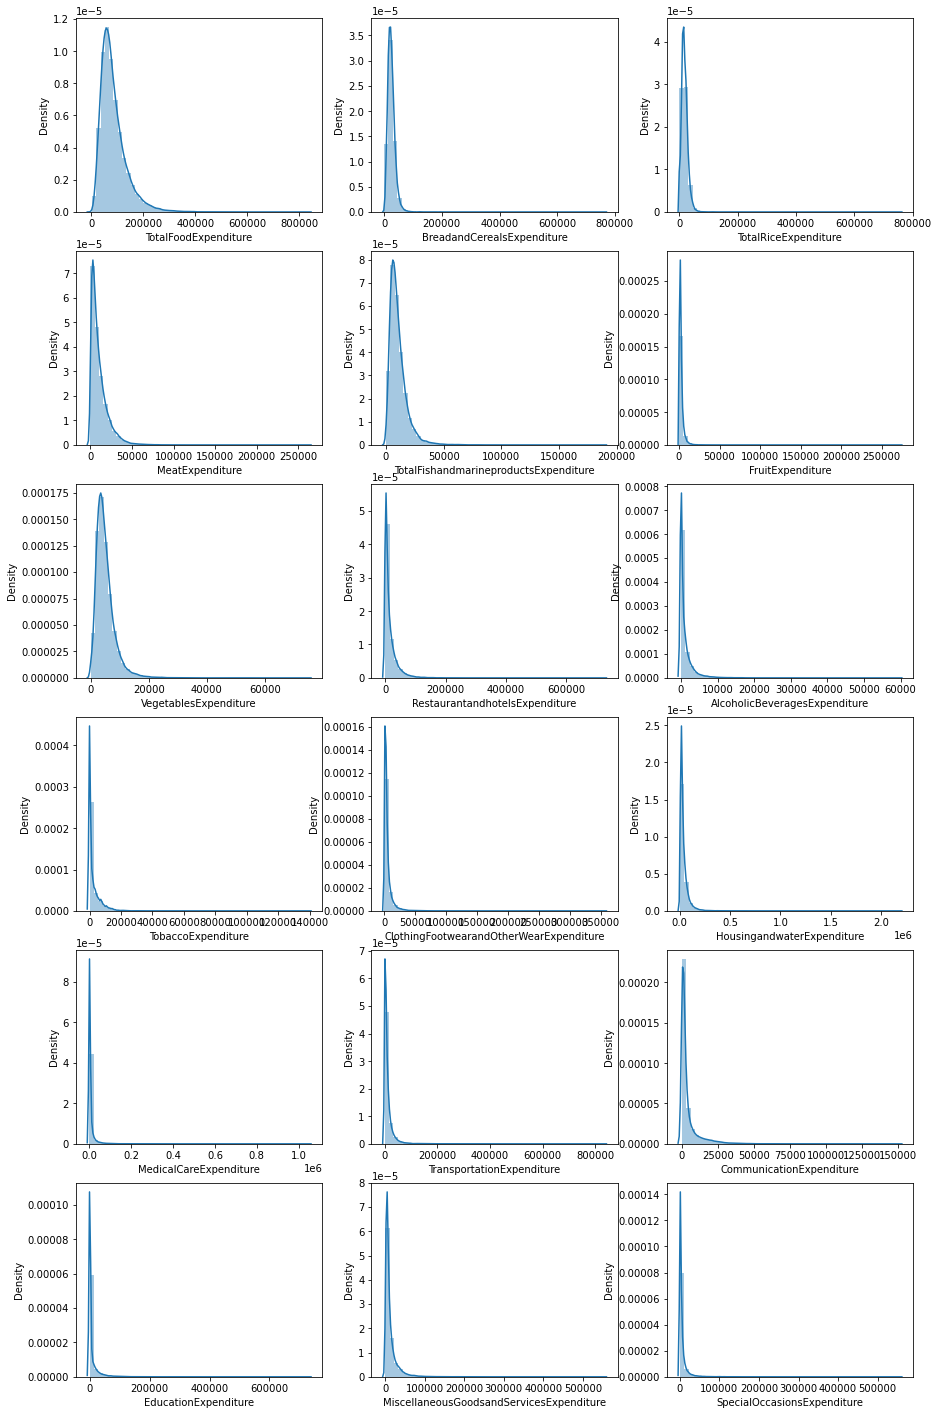

In [34]:
total_different_expenditures = data2.loc[:, expenditures]
plt.figure(figsize=(15, 25))
i = 1
for exp in expenditures :
    plt.subplot(6,3,i)
    sns.distplot(total_different_expenditures[exp])
    i += 1

In [35]:
female = data[data['HouseholdHeadSex'] == 'Female']
female_rowcount = len(female.index)
male = data[data['HouseholdHeadSex'] == 'Male']
male_rowcount = len(male.index)
print('HOUSEHOLD HEAD SEX (HHS)')
print ('Number of rows where HHS is Female: ', female_rowcount, 'Percentage: ', "{:.2%}".format(female_rowcount/(female_rowcount+male_rowcount)))
print ('Number of rows where HHS is Male: ', male_rowcount, 'Percentage: ', "{:.2%}".format(male_rowcount/(female_rowcount+male_rowcount)))
print('TOTAL HOUSEHOLD INCOME (THI)')
print ('Mean THI where HHS is Female: ', "{:,.2f}".format(female['TotalHouseholdIncome'].mean()))
print ('Mean THI where HHS is Male: ', "{:,.2f}".format(male['TotalHouseholdIncome'].mean()))

HOUSEHOLD HEAD SEX (HHS)
Number of rows where HHS is Female:  9061 Percentage:  21.81%
Number of rows where HHS is Male:  32483 Percentage:  78.19%
TOTAL HOUSEHOLD INCOME (THI)
Mean THI where HHS is Female:  262,804.55
Mean THI where HHS is Male:  243,301.95


C:\Users\rames\anaconda3\envs\nus\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


[Text(0, -2000000.0, '-2,000,000.0'),
 Text(0, 0.0, '0.0'),
 Text(0, 2000000.0, '2,000,000.0'),
 Text(0, 4000000.0, '4,000,000.0'),
 Text(0, 6000000.0, '6,000,000.0'),
 Text(0, 8000000.0, '8,000,000.0'),
 Text(0, 10000000.0, '10,000,000.0'),
 Text(0, 12000000.0, '12,000,000.0'),
 Text(0, 14000000.0, '14,000,000.0')]

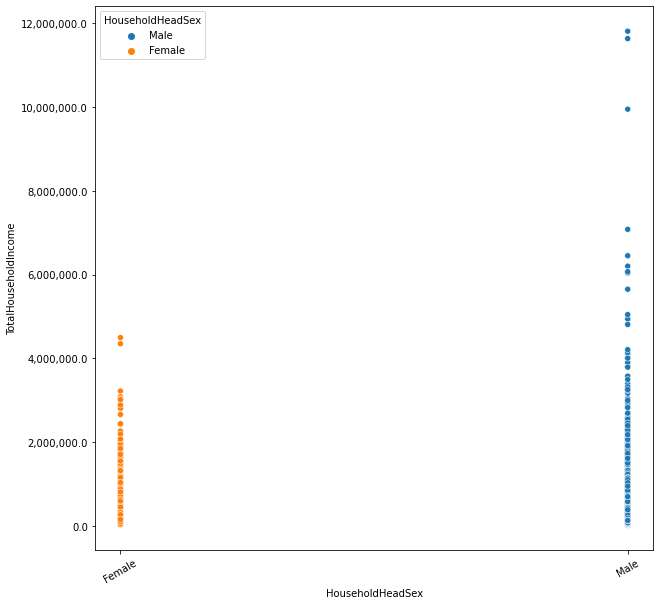

In [36]:
plt.figure(figsize=(10,10))
#plt.ylim(0, 5000000)
plt.xticks(rotation=30)
#plt.axes.ticklabel_format(axis='y', style='plain')
#graph = sns.scatterplot(x=raw_data['Region'], y=raw_data['Total Household Income'], hue=raw_data['Household Head Sex'], hue_order=['Male', 'Female'])
graph = sns.scatterplot(x=data['HouseholdHeadSex'], y=data['TotalHouseholdIncome'], hue=data['HouseholdHeadSex'], hue_order=['Male', 'Female'])
ylabels = ['{:,}'.format(y) for y in graph.get_yticks()]
graph.set_yticklabels(ylabels)

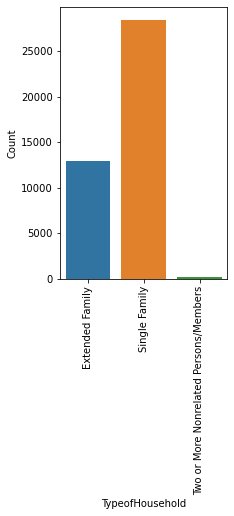

In [38]:
%matplotlib inline
var = 'TypeofHousehold'
f, ax = plt.subplots(figsize=(3, 5))
s = sns.countplot(x=var, data=data)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
s.set(ylabel='Count')
plt.show()

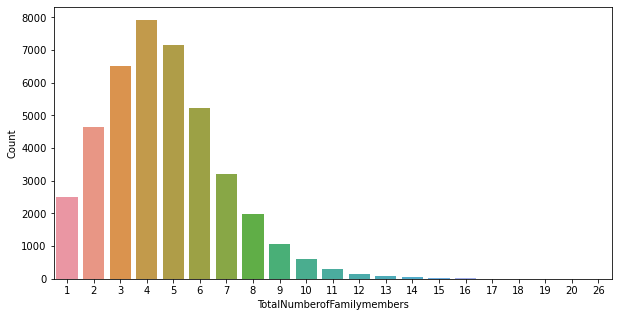

In [39]:
var = 'TotalNumberofFamilymembers'
fig, ax = plt.subplots(figsize=(10,5))
s = sns.countplot(x=var, data=data)
s.set(ylabel='Count')
plt.show()

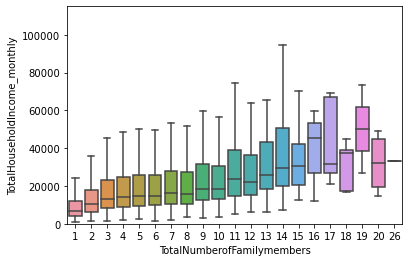

In [40]:
data2['TotalHouseholdIncome_monthly'] = data2['TotalHouseholdIncome']/12
target = 'TotalHouseholdIncome_monthly'
s = sns.boxplot(x=var, y=target, data=data2, fliersize=0)
s.set(ylabel=target)
s.set_ylim(0,115000)
plt.show()

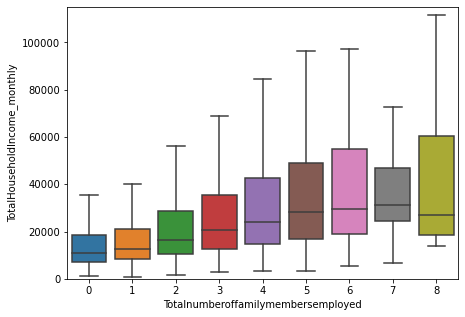

In [41]:
var = 'Totalnumberoffamilymembersemployed'
fig, ax = plt.subplots(figsize=(7,5))
s = sns.boxplot(x=var, y=target, data=data2, fliersize=0)
s.set(ylabel=target)
s.set_ylim(0,115000)
plt.show()

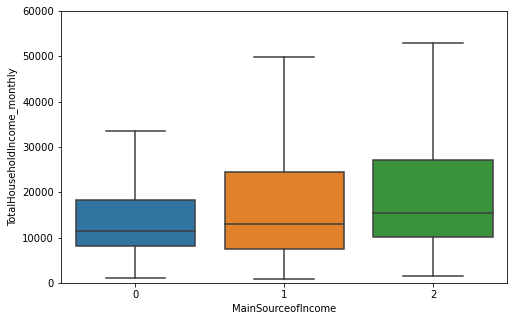

In [42]:
# 0 --> wage salaries
# 1 --> Other source of income
# 3 --> Enterprenuel activities
var = 'MainSourceofIncome'
fig, ax = plt.subplots(figsize=(8,5))
s = sns.boxplot(x=var, y=target, data=data2, fliersize=0)
s.set_ylim(0,60000)
plt.show()

In [43]:
var = 'HouseholdHeadClassofWorker' 
a = data[var].astype('category').cat.categories
b = {i:data[var].value_counts()[i] for i in a}
b = sorted(b.items(), key=lambda kv: kv[1], reverse=True)
a = [i[0] for i in b if i[0] != 'Other']
c = [i[1] for i in b if i[0] != 'Other']

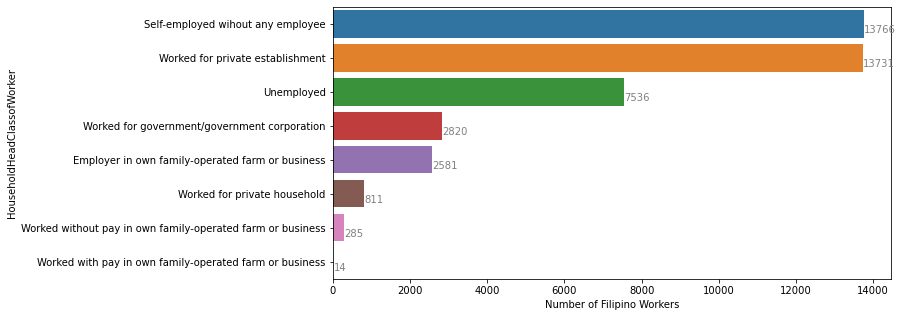

In [44]:
f, ax = plt.subplots(figsize=(10, 5))
s = sns.barplot(x=c, y=a)
s.set_yticklabels(s.get_yticklabels())
s.set(ylabel=var, xlabel='Number of Filipino Workers')
for i, v in enumerate(c):
    s.text(v + 3, i + .25, str(v), color='gray')
plt.show()

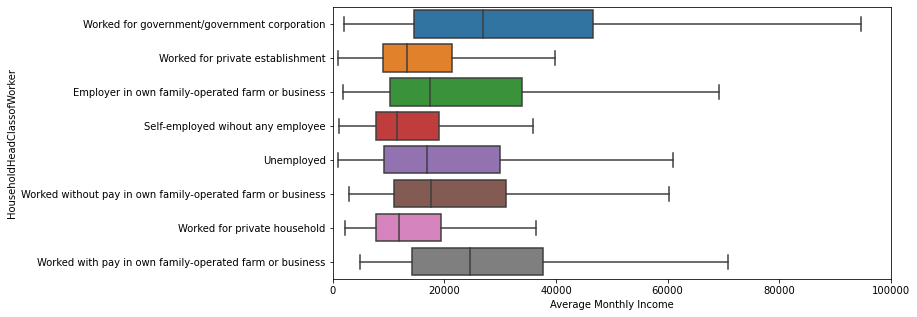

In [45]:
f, ax = plt.subplots(figsize=(10, 5))
s = sns.boxplot(y=data[var], x=data2[target], fliersize=0)
s.set_yticklabels(s.get_yticklabels())
s.set(ylabel=var, xlabel='Average Monthly Income')
s.set_xlim(0, 100000)
plt.show()

In [46]:
var = 'HouseholdHeadOccupation' 
a = data[var].astype('category').cat.categories
b = {i:data[var].value_counts()[i] for i in a}
b = sorted(b.items(), key=lambda kv: kv[1], reverse=True)[:20]
a = [i[0] for i in b if i[0] != 'Other']
c = [i[1] for i in b if i[0] != 'Other']

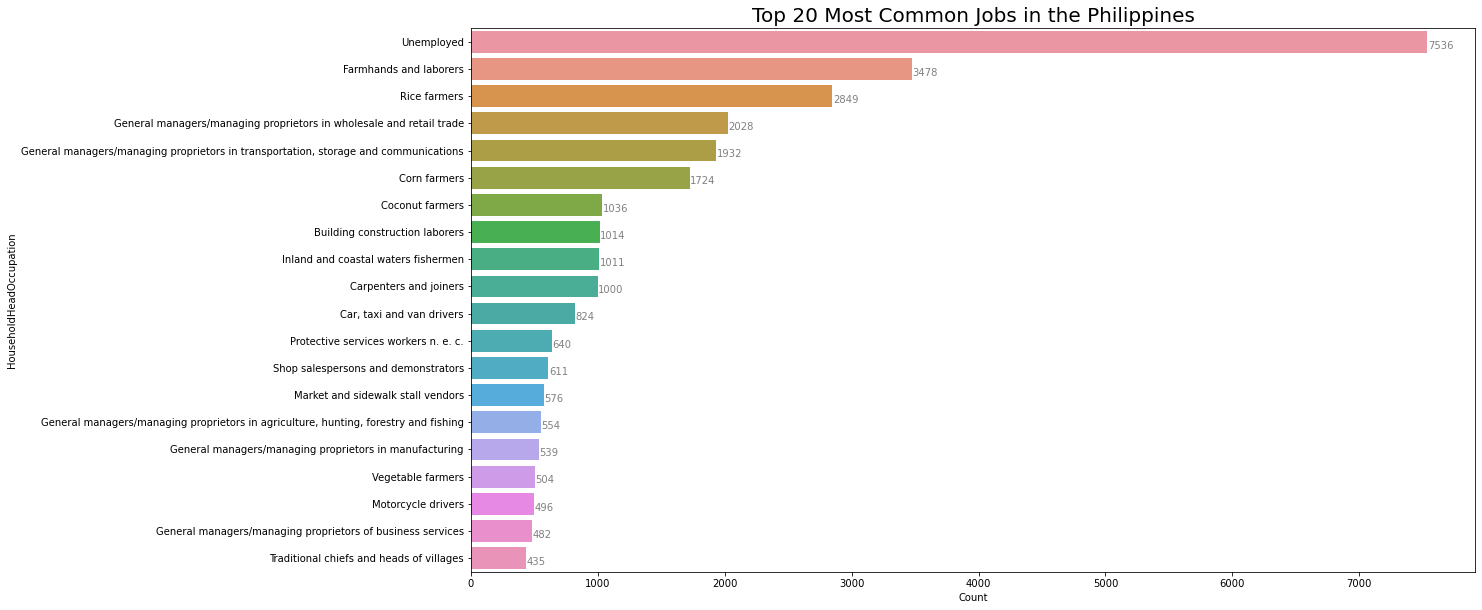

In [47]:
f, ax = plt.subplots(figsize=(18, 10))
s = sns.barplot(x=c, y=a)
s.set_yticklabels(s.get_yticklabels())
s.set(ylabel=var, xlabel='Count')
s.set_title("Top 20 Most Common Jobs in the Philippines", size=20)
for i, v in enumerate(c):
    s.text(v + 3, i + .25, str(v), color='gray')
plt.show()

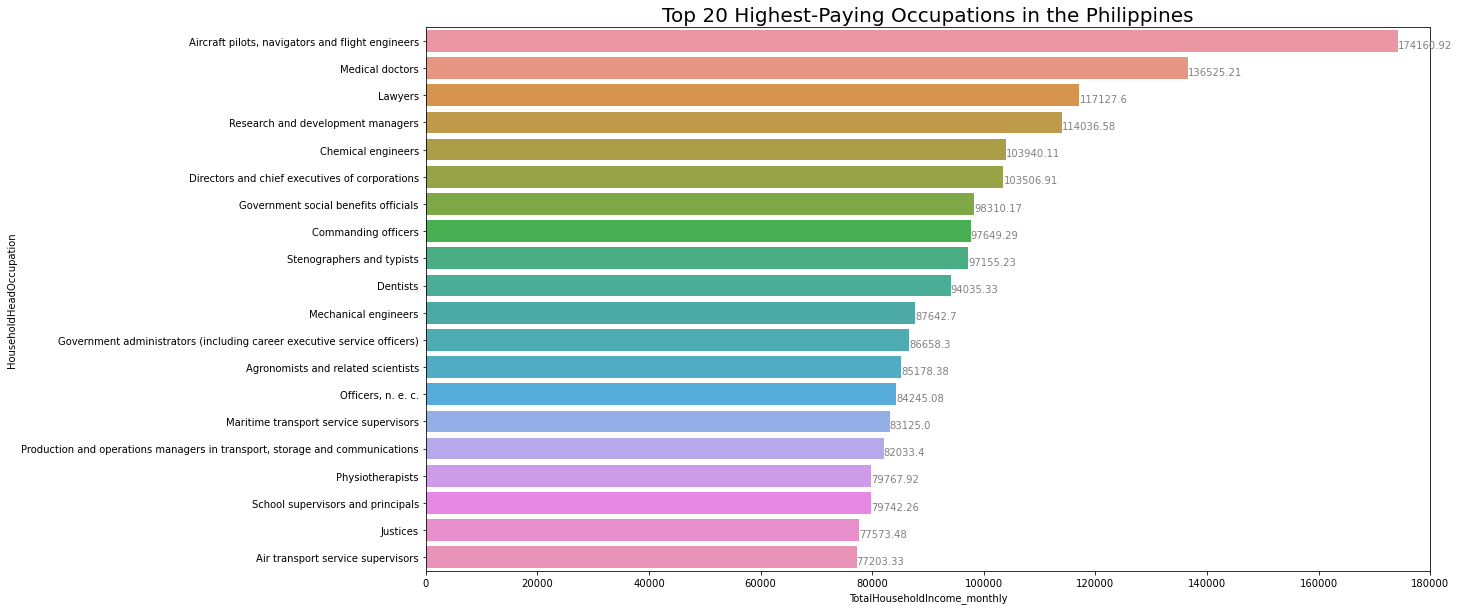

In [48]:
data['TotalHouseholdIncome_monthly'] = data['TotalHouseholdIncome']/12
target = 'TotalHouseholdIncome_monthly'
var = 'HouseholdHeadOccupation' 
a = data[var].astype('category').cat.categories
b = {i:data[data[var]==i][target].mean() for i in a}
b = sorted(b.items(), key=lambda kv: kv[1], reverse=True)
d = [i for i in b[:20]]
a = [i[0] for i in d]
c = [i[1] for i in d]
f, ax = plt.subplots(figsize=(18, 10))
s = sns.barplot(x=c, y=a)
s.set_yticklabels(s.get_yticklabels())
s.set(ylabel=var, xlabel=target)
s.set_title("Top 20 Highest-Paying Occupations in the Philippines", size=20)
for i, v in enumerate(c):
    s.text(v + 3, i + .25, str(round(v,2)), color='gray')
s.set_xlim(0,180000)
plt.show()

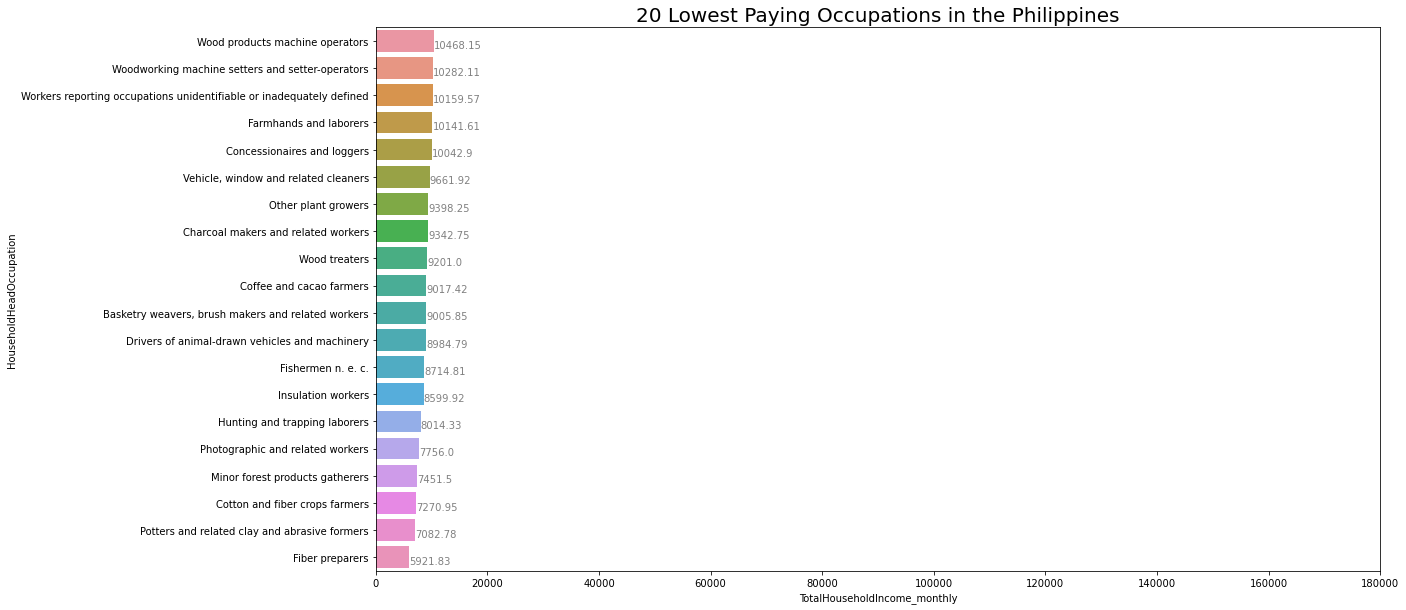

In [49]:
var = 'HouseholdHeadOccupation' 
a = data[var].astype('category').cat.categories
b = {i:data[data[var]==i][target].mean() for i in a}
b = sorted(b.items(), key=lambda kv: kv[1], reverse=True)
d = [i for i in b[-20:]]
a = [i[0] for i in d]
c = [i[1] for i in d]
f, ax = plt.subplots(figsize=(18, 10))
s = sns.barplot(x=c, y=a)
s.set_yticklabels(s.get_yticklabels())
s.set(ylabel=var, xlabel=target)
s.set_title("20 Lowest Paying Occupations in the Philippines", size=20)
for i, v in enumerate(c):
    s.text(v + 3, i + .25, str(round(v,2)), color='gray')
s.set_xlim(0,180000)
plt.show()

In [50]:
var = 'HouseholdHeadHighestGradeCompleted'
data[var] = data[var].replace('Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)', 'Programs of Education at the Third Level');
data[var] = data[var].replace('Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree', 'Third Level that Leads to Non-Baccalureate Award')

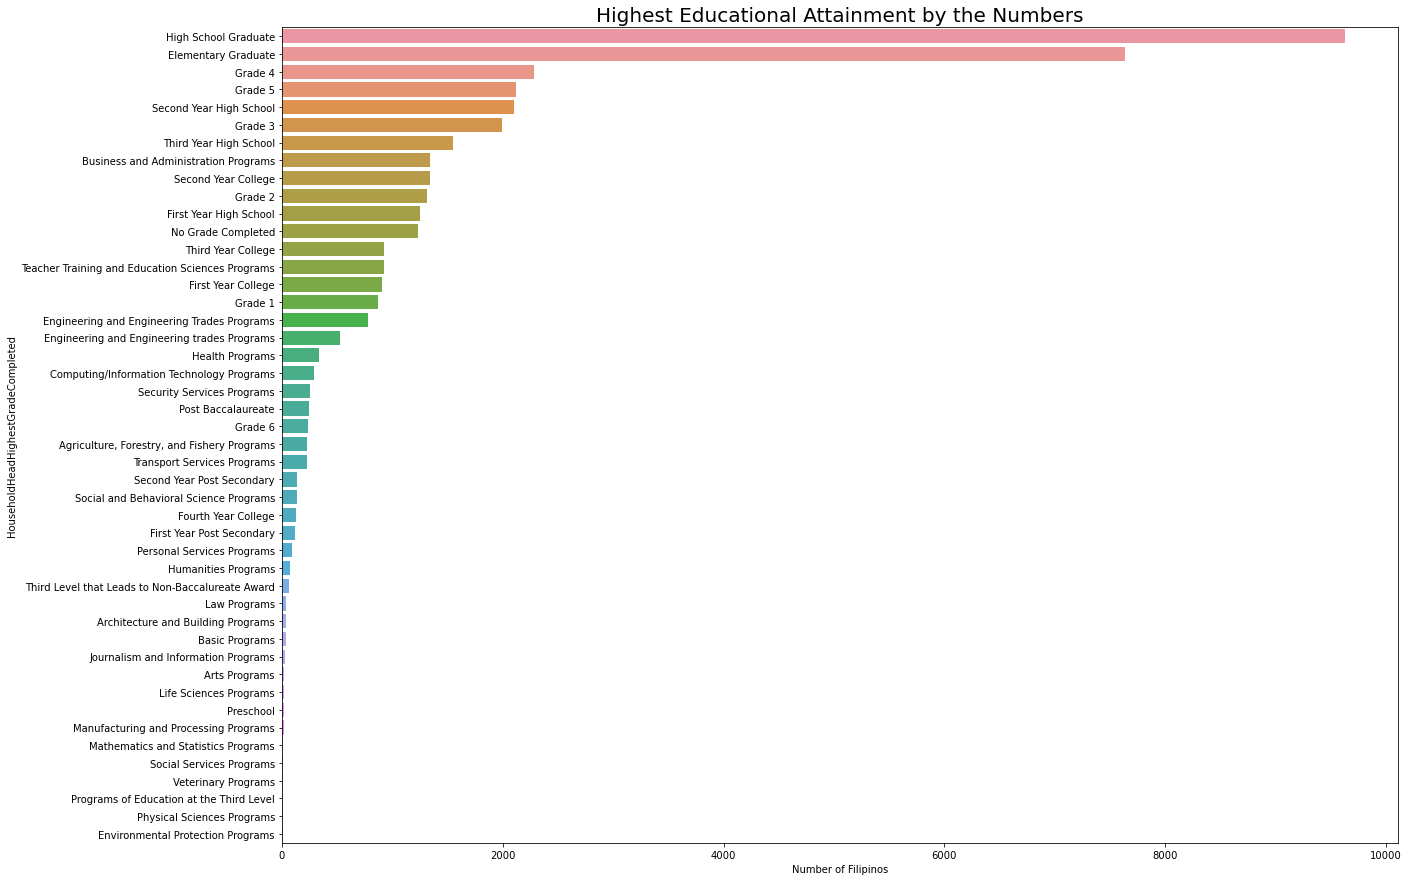

In [51]:
var = 'HouseholdHeadHighestGradeCompleted' 
f, ax = plt.subplots(figsize=(20, 15))
s = sns.countplot(y=var, data=data, order=data[var].value_counts().index)
s.set_yticklabels(s.get_yticklabels())
s.set(ylabel=var, xlabel='Number of Filipinos')
s.set_title("Highest Educational Attainment by the Numbers", size=20)
plt.show()

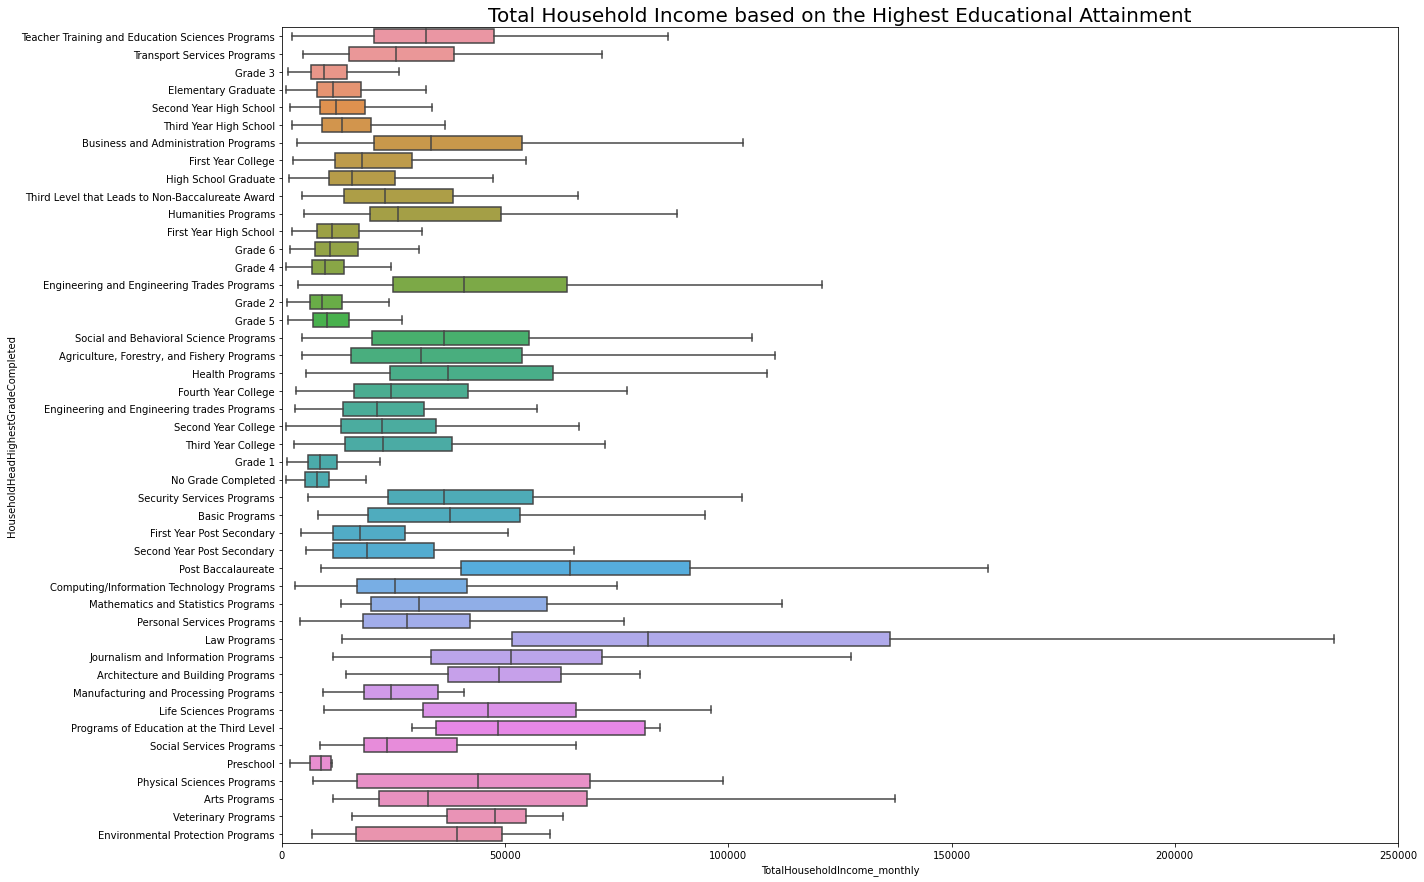

In [52]:
var = 'HouseholdHeadHighestGradeCompleted' 
f, ax = plt.subplots(figsize=(20, 15))
s = sns.boxplot(y=var, x=target, data=data, fliersize=0)
s.set_yticklabels(s.get_yticklabels())
s.set(ylabel=var, xlabel=target)
s.set_xlim(0,250000)
s.set_title("Total Household Income based on the Highest Educational Attainment", size=20)
plt.show()